### Importing libraries

In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Data loading and cleaning

In [450]:
box_office = pd.read_csv('data/box_office.csv')
print(box_office.shape)
# train.head()

(3000, 203)


In [451]:
# for col in box_office.columns:
#     print(col)

In [452]:
# figuring out the columns that we will need for analysis
column = ['id','budget','homepage','imdb_id', 'original_language', 'original_title','overview','popularity','release_date','runtime','tagline',
          'title','revenue','has_collection','num_genres','num_companies','num_countries','num_languages','num_cast','num_crew']
movies_df = box_office[column].copy()
# movies_df.head()

### Data Visualization


#### Task 1: Visualizing the target variable (Revenue)

C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='revenue', ylabel='Count'>

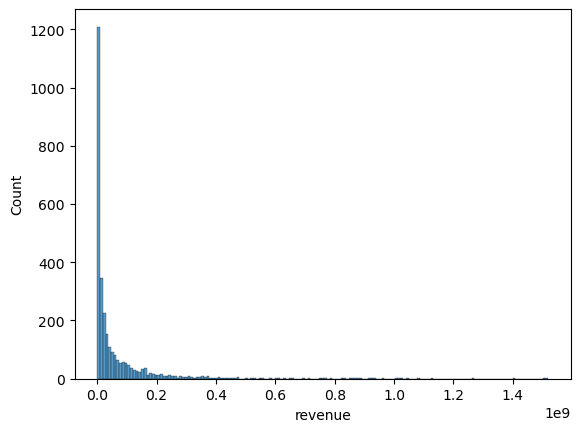

In [200]:
sns.histplot(x = 'revenue', data = movies_df)

C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


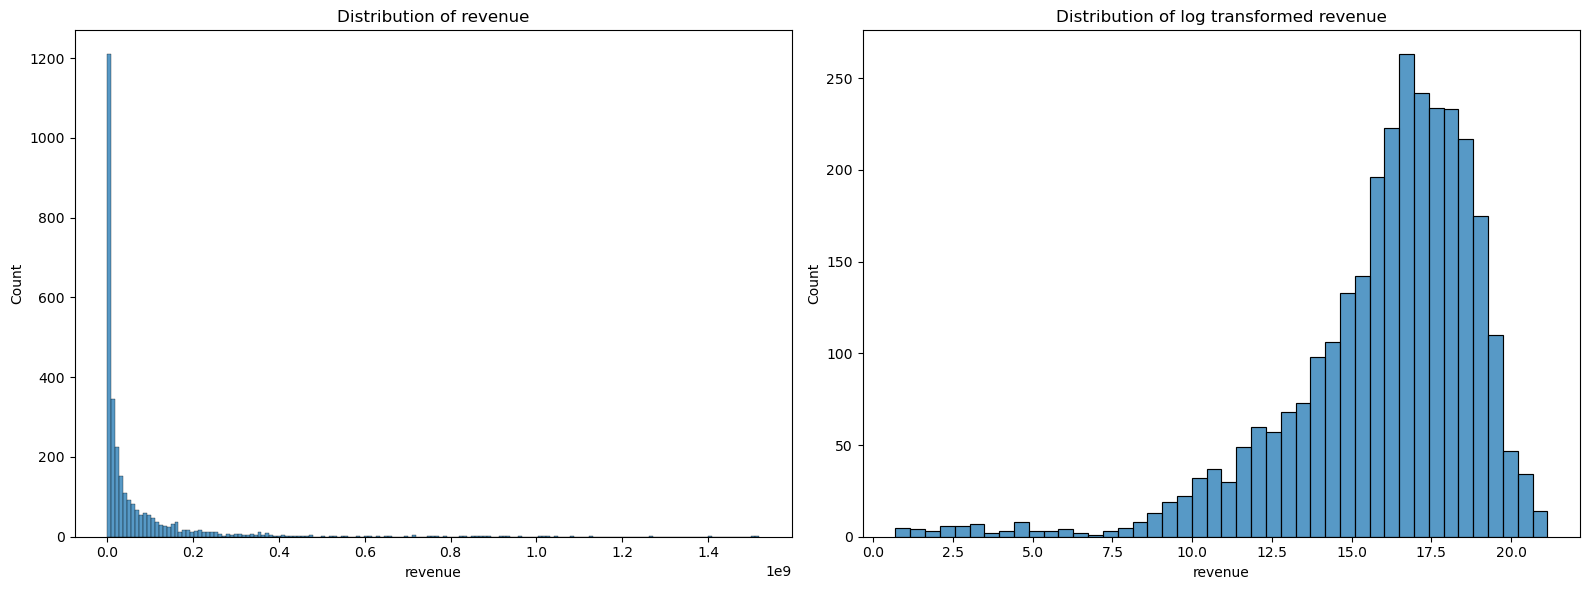

In [449]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(train['revenue'],kde=False);
plt.title('Distribution of revenue');

plt.subplot(1,2,2)
sns.histplot(np.log1p(train['revenue']), kde = False);
plt.title('Distribution of log transformed revenue');

plt.tight_layout()
plt.show()

In [361]:
movies_df['revenue'].describe()

count    3.000000e+03
mean     6.672582e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [363]:
revenue_stats = movies_df['revenue'].describe()
mean_revenue = revenue_stats.mean()
revenue_q1 = revenue_stats['25%']
revenue_q3 = revenue_stats['75%']
revenue_iqr = revenue_q3 - revenue_q1
revenue_range = [revenue_q1, revenue_q3]

print(f'Average revenue of the movie dataset is = {mean_revenue}.')
print(f'25 percentile of revenue lies at {revenue_q1}.')
print(f'75 percentile of revenue lies at {revenue_q3}.')
print(f'IQR of revenue is = {revenue_iqr}')
print(f'Revenue range where majority of data points lie is = {revenue_range}.')

Average revenue of the movie dataset is = 226490644.05979106.
25 percentile of revenue lies at 2379808.25.
75 percentile of revenue lies at 68919203.5.
IQR of revenue is = 66539395.25
Revenue range where majority of data points lie is = [2379808.25, 68919203.5].


In [276]:
# creating a new column in train dataframe as 'log_revenue' and 'log_budget'
movies_df['log_revenue'] = np.log1p(movies_df['revenue'])
movies_df['log_budget'] = np.log1p(movies_df['budget'])
movies_df.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'runtime', 'tagline',
       'title', 'revenue', 'has_collection', 'num_genres', 'num_companies',
       'num_countries', 'num_languages', 'num_cast', 'num_crew',
       'changed_title', 'has_homepage', 'has_tagline', 'released_month',
       'released_date', 'log_revenue', 'log_budget'],
      dtype='object')

#### Task 2: Relationship between Film Revenue and Budget

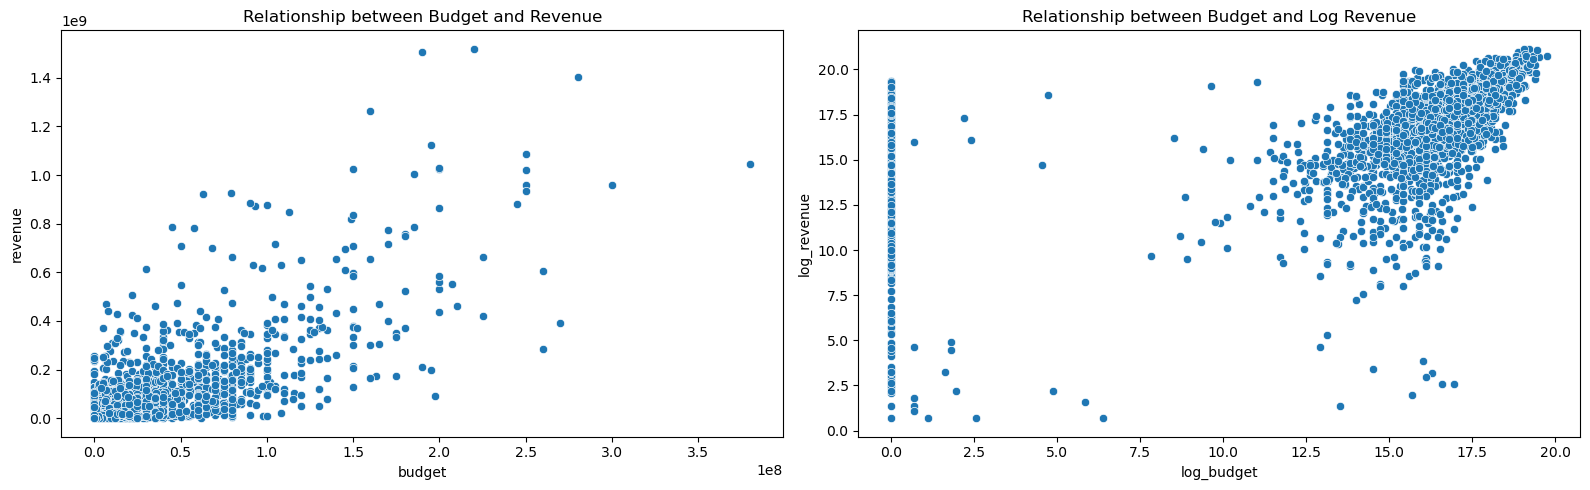

In [441]:
# film revenue and budget can be corelated

# creating scatter plot got 'budget vs revenue' and 'log_budget vs log_revenue' for better comparison
plt.figure(figsize = (16,5), tight_layout = True)

plt.subplot(1,2,1)
sns.scatterplot(x = movies_df['budget'], y = movies_df['revenue'])
plt.title('Relationship between Budget and Revenue');

plt.subplot(1,2,2)
sns.scatterplot(x = movies_df['log_budget'], y = movies_df['log_revenue'])
plt.title('Relationship between Budget and Log Revenue');

#### Task 4: Impact of having an official homepage on revenue

In [208]:
movies_df['homepage'].value_counts().head(10)

homepage
http://www.transformersmovie.com/                      4
http://www.thehobbit.com/                              2
http://www.lordoftherings.net/                         2
http://sonyclassics.com/whiplash/                      1
https://www.facebook.com/thefinesthoursmovie           1
http://sonyclassics.com/pariscanwait/                  1
http://www.maxpaynethemovie.com                        1
http://www.sonypictures.com/movies/afewgoodmen/        1
http://www.theasylum.cc/product.php?id=203             1
http://www.miramax.com/movie/the-cider-house-rules/    1
Name: count, dtype: int64

In [226]:
# creating a binary feature to check whether the movie have a homepage or not
movies_df['has_homepage'] = 0
movies_df.loc[movies_df['homepage'].isnull() == False, 'has_homepage'] = 1

C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


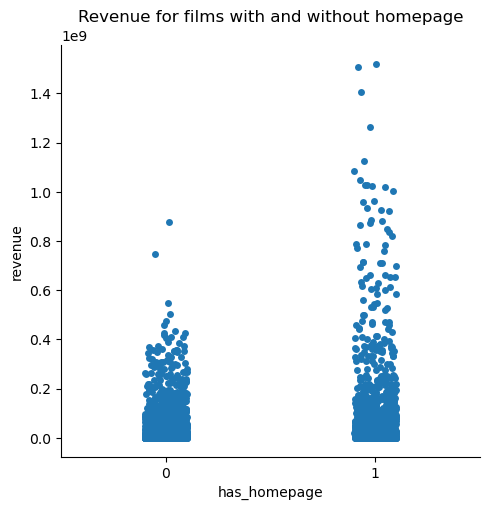

In [227]:
# since 'has_homepage' has categorical function, we use sns.catplot to visualize it
sns.catplot(x = 'has_homepage', y = 'revenue', data = movies_df);
plt.title('Revenue for films with and without homepage');

#### Task 4: Influence of film language on revenue

In [213]:
# getting top 10 languages to compare
language_data = movies_df.loc[movies_df['original_language'].isin(movies_df['original_language'].value_counts().head(10).index),:]
language_data.shape

(2905, 23)

Text(0.5, 1.0, 'Mean log_revenue per language')

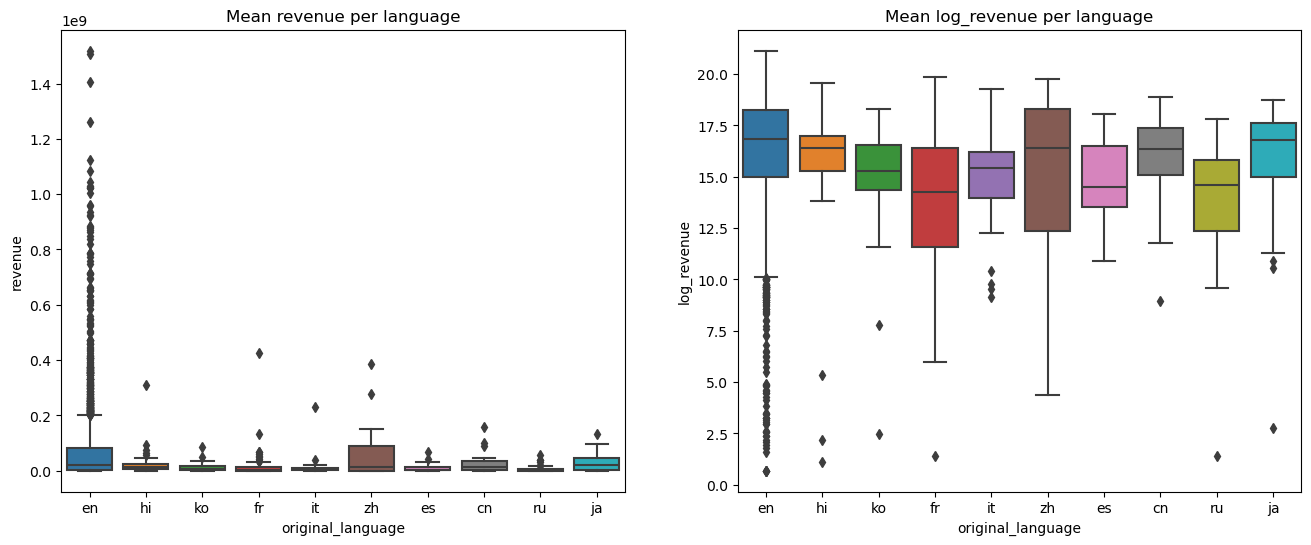

In [214]:
# boxplot is a great tool to identify outliers in the data
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.boxplot(x = 'original_language', y = 'revenue', data = language_data)
plt.title('Mean revenue per language')

plt.subplot(1,2,2)
sns.boxplot(x = 'original_language', y = 'log_revenue', data = language_data)
plt.title('Mean log_revenue per language')

#### Task 5: Effect of changing movie title before release on revenue

In [223]:
movies_df['changed_title'] = 'Yes'
movies_df.loc[movies_df['original_title'] == movies_df['title'], 'changed_title'] = 'No'

C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


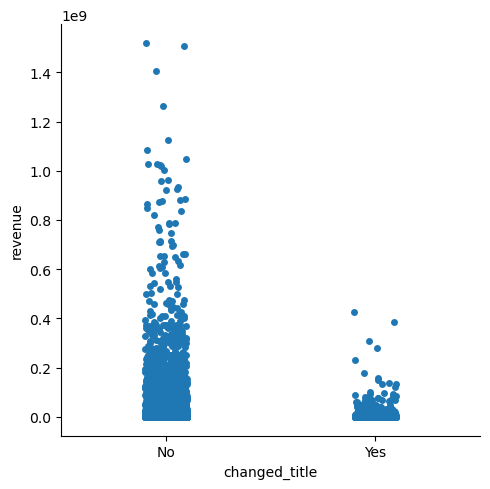

In [286]:
sns.catplot(x = 'changed_title', y = 'revenue', data = movies_df)

#### Task 6: The role of having a tagline on revenue

In [370]:
# having a tagline:
movies_df['has_tagline'] = 'Yes'
movies_df.loc[movies_df['tagline'].isnull() == True, 'has_tagline'] = 'No'
movies_df['has_tagline'].value_counts()

has_tagline
Yes    2405
No      595
Name: count, dtype: int64

<Axes: xlabel='has_tagline', ylabel='log_revenue'>

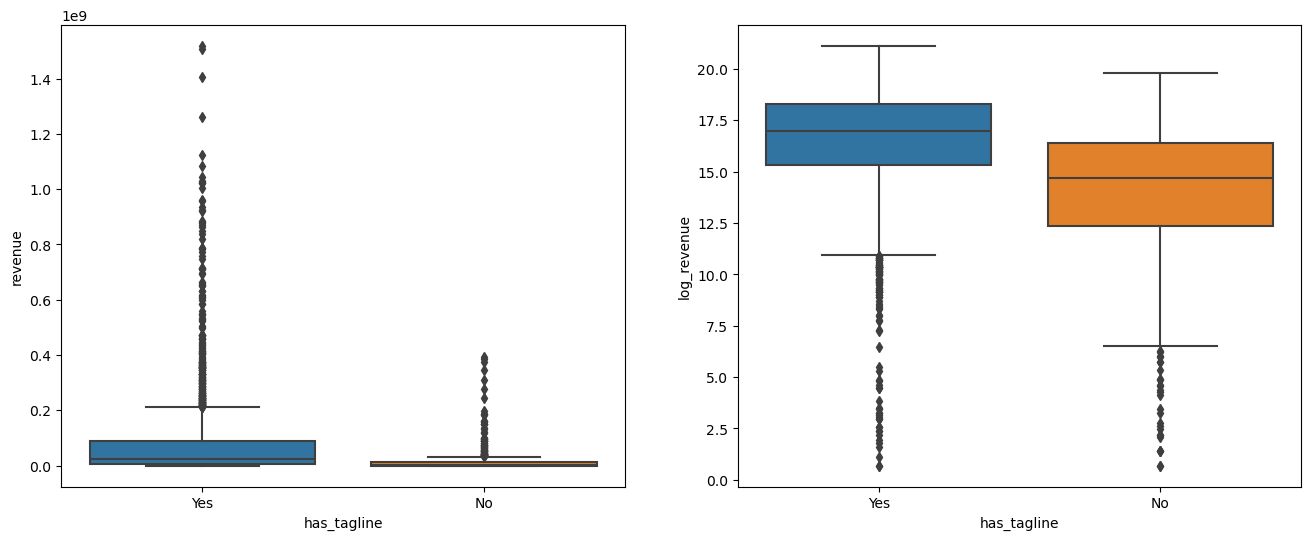

In [371]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.boxplot(x = 'has_tagline', y = 'revenue', data = movies_df)

plt.subplot(1,2,2)
sns.boxplot(x = 'has_tagline', y = 'log_revenue', data = movies_df)

#### Task 7: Revenue generation across different release months

In [262]:
release_date = pd.to_datetime(movies_df['release_date'])
movies_df['released_date'] = release_date
movies_df['released_month'] = movies_df['released_date'].dt.month_name()
movies_df.drop(columns = 'release_date', inplace = True)

C:\Users\bhana\AppData\Local\Temp\ipykernel_109388\827602729.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  release_date = pd.to_datetime(movies_df['release_date'])


C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


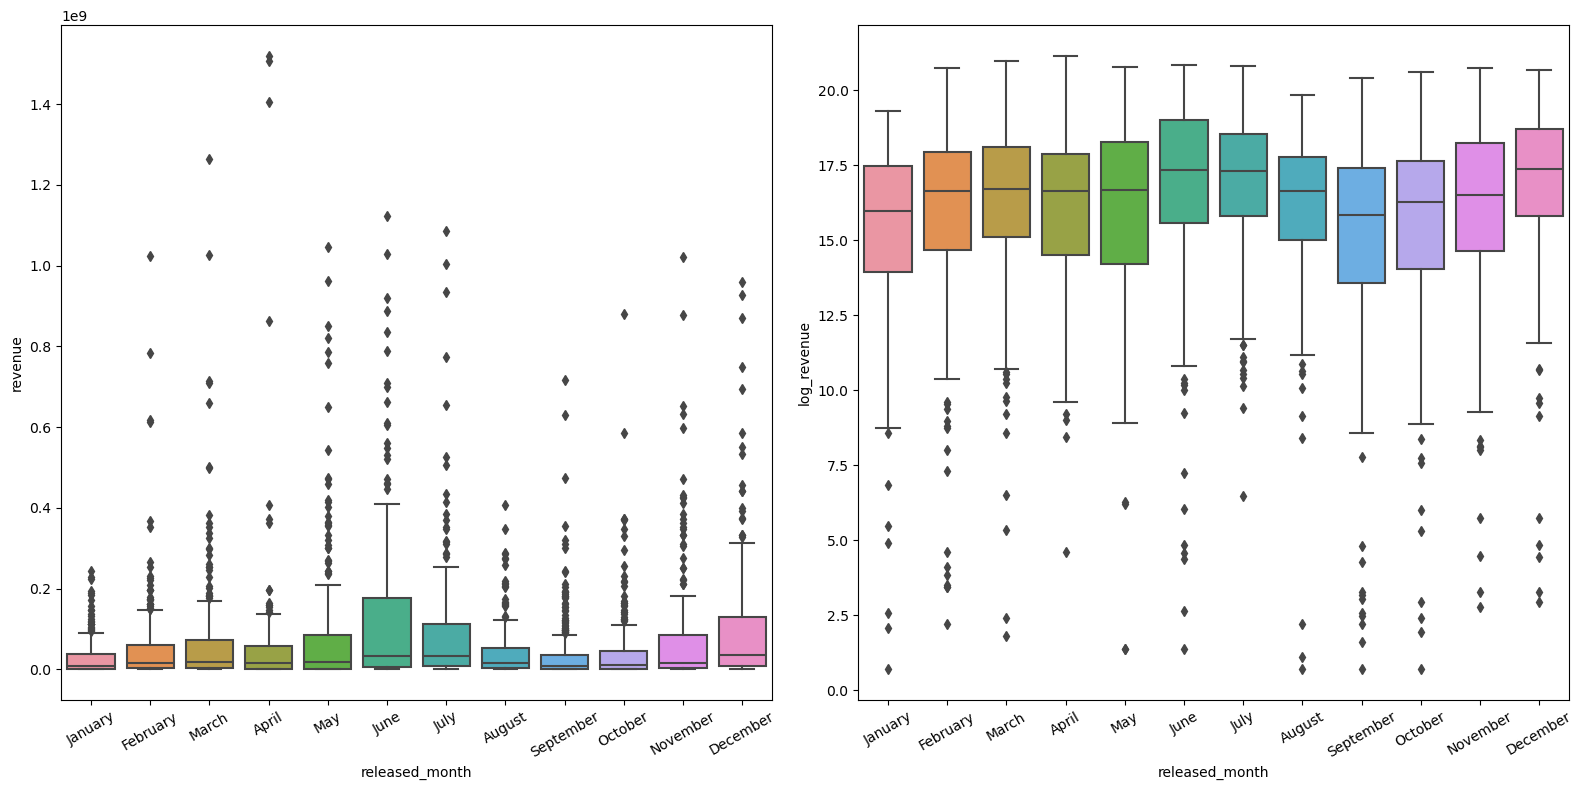

In [402]:
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]             
movies_df['released_month'] = pd.Categorical(movies_df['released_month'], categories=months_order)

fig, ax = plt.subplots(1,2, figsize = (16,8),tight_layout = True)

ax[0] = sns.boxplot(x = 'released_month',y = 'revenue', data = movies_df, ax = ax[0])
ax[0].tick_params(axis='x', rotation=30) 

ax[1] = sns.boxplot(x = 'released_month',y = 'log_revenue', data = movies_df, ax = ax[1])
ax[1].tick_params(axis='x', rotation=30) 

plt.show()

#### Task 8: Descriptive statistics of film runtime

In [415]:
movies_df['runtime'].describe()

count    3000.000000
mean      107.856571
std        22.079069
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [416]:
movies_df['runtime'].isna().value_counts()

runtime
False    3000
Name: count, dtype: int64

In [418]:
runtime_stats = movies_df['runtime'].describe()
runtime_mean = runtime_stats['mean']
runtime_mean

107.85657104736491

In [419]:
# Q1 = np.percentile(movies_df['runtime'], 25)
movies_df.loc[movies_df['runtime'].isna() == True, 'runtime'] = runtime_mean

In [421]:
runtime_iqr = [movie_stat['25%'],movie_stat['75%']]
print(f'Average runtime of the movies dataset = {runtime_mean}')
print(f'Q1-Q3 range of runtime = {runtime_iqr}')

Average runtime of the movies dataset = 107.85657104736491
Q1-Q3 range of runtime = [94.0, 118.0]


C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


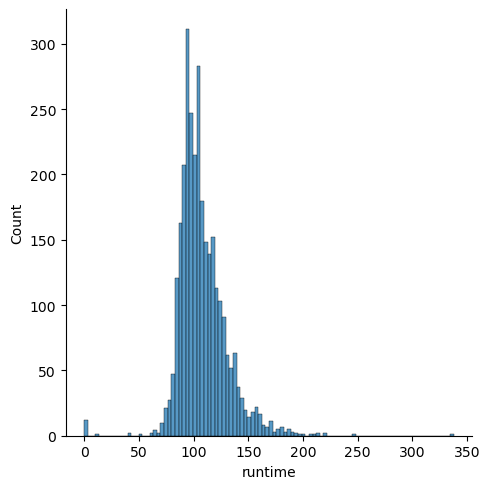

In [439]:
sns.displot(x = 'runtime', data = movies_df);

#### Task 9: Relationship between the number of genres and revenue

In [405]:
movies_df.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'runtime', 'tagline',
       'title', 'revenue', 'has_collection', 'num_genres', 'num_companies',
       'num_countries', 'num_languages', 'num_cast', 'num_crew',
       'changed_title', 'has_homepage', 'has_tagline', 'released_month',
       'released_date', 'log_revenue', 'log_budget'],
      dtype='object')

In [349]:
movies_df['num_genres'] = movies_df['num_genres'].astype('int64')

In [406]:
movies_df['num_genres'].value_counts()

num_genres
2      972
3      900
1      591
4      393
5      111
6       21
0        7
7        3
107      2
Name: count, dtype: int64

C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


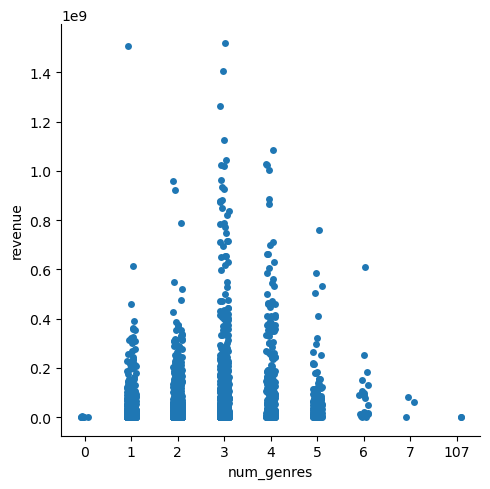

In [359]:
sns.catplot(x = 'num_genres', y = 'revenue', data = movies_df)

#### Task 10: Frequent words in Film Titles and Descriptions

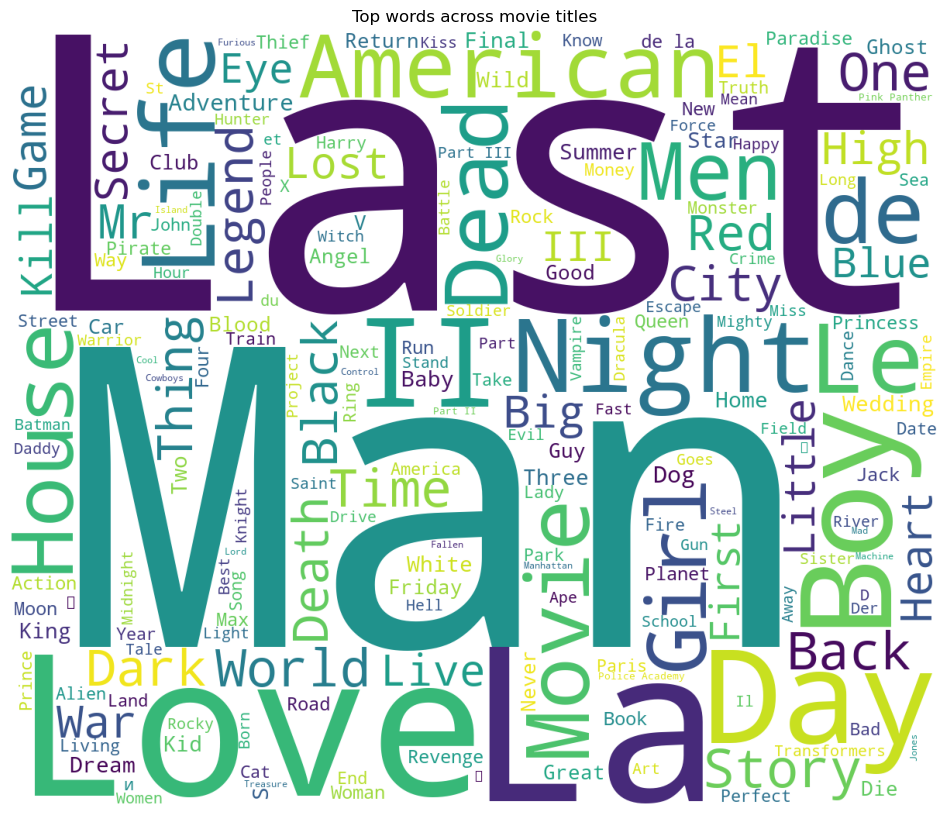

In [17]:
# creating word cloud to identify most frequently used words in film titles and descriptions
plt.figure(figsize = (12,12))
text = ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size = None,
                      background_color = 'white',
                      width = 1200, height = 1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words across movie titles')
plt.axis('off')
plt.show()

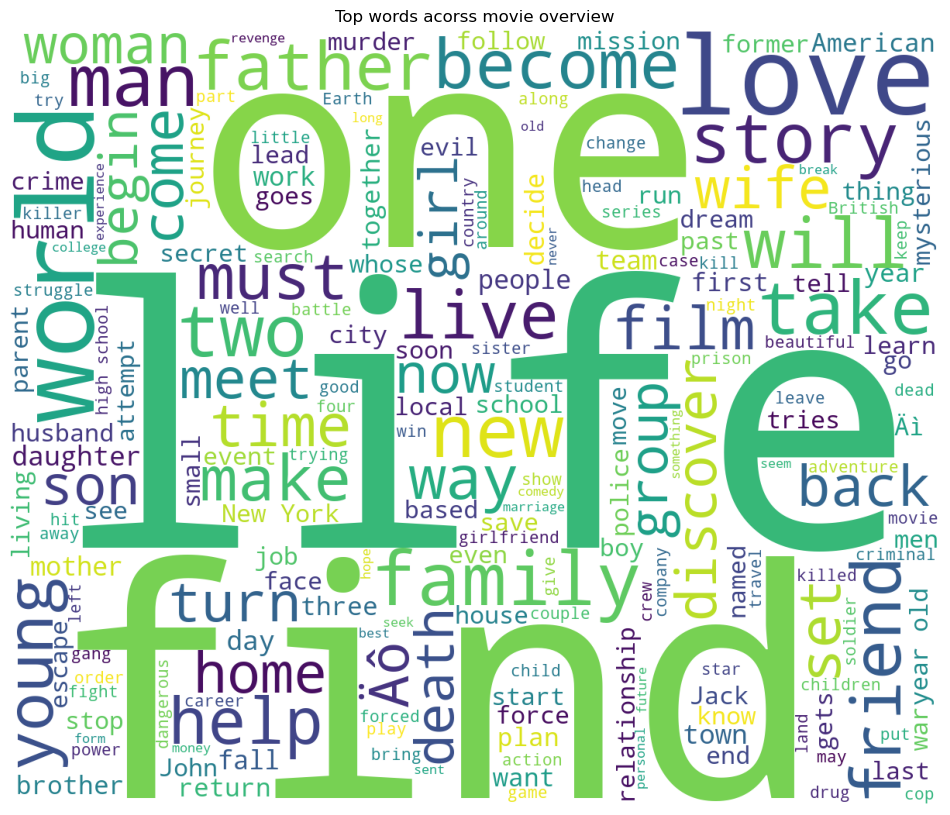

In [407]:
# most frequenctly used words in description
plt.figure(figsize = (12,12))
text = ' '.join(train['overview'].fillna(' ').values)
wordcloud = WordCloud(max_font_size = None,
                      background_color = 'white',
                      width = 1200, height = 1000).generate(text)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Top words acorss movie overview')
plt.show()